In [5]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
from matplotlib import  colors
from evaluations.scatter import fancy_scatter_plot
from products.plot_settings import PRODUCT_PLOT_NAMES

analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/{analysis_type}'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.where(nasa_l3_metrics_ds>0)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.where(nasa_pseudo_l3_metrics_ds>0)
analyses_dict_v3 = {METEOFRANCE_VAR_NAME: mf_metrics_ds,  NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds,NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

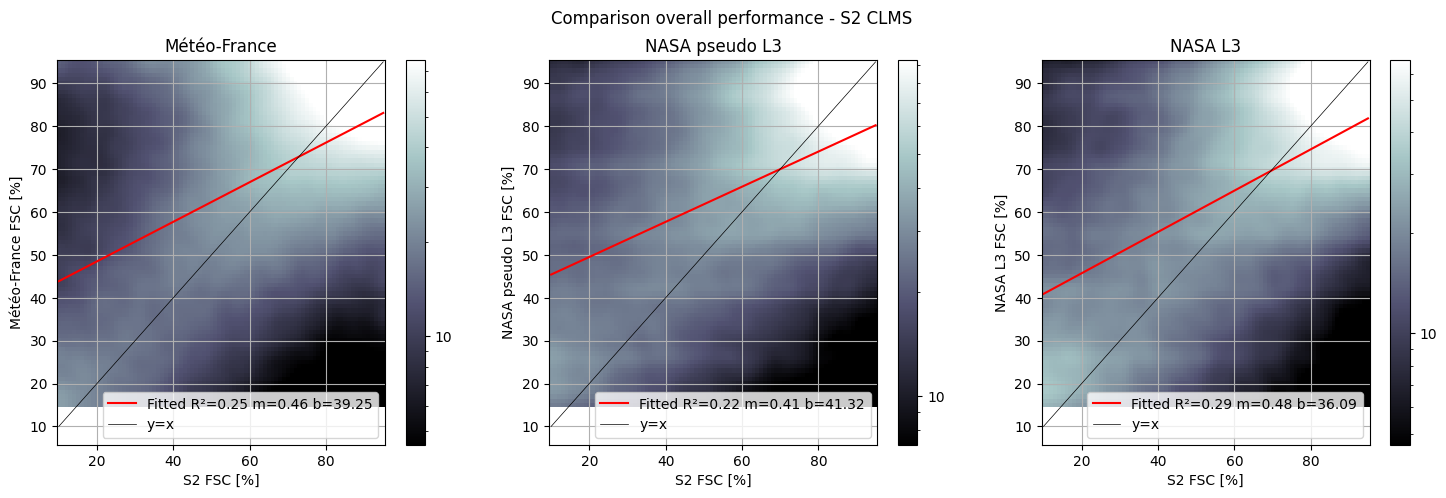

In [7]:


fig, ax = plt.subplots(1,len(analyses_dict_v3), figsize=(6*len(analyses_dict_v3), 5))
fig.suptitle('Comparison overall performance - S2 CLMS')



for i, (k,v) in enumerate(analyses_dict_v3.items()):
    reduced_v = v.sel(ref_bins=slice(10,95),forest_mask=[0],test_bins=slice(15,95)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=2)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")
    


Text(0, 0.5, 'Météo-France')

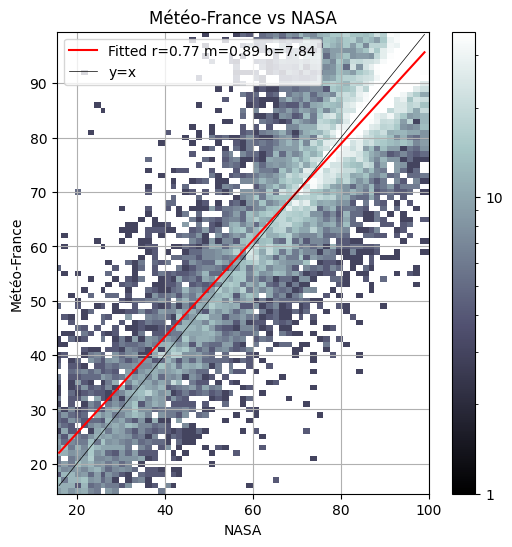

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

nasa_vs_mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_vs_nasa_l3_res_375m.nc", decode_cf=True).dropna(dim='ref_bins', how='all')
reduced_v = nasa_vs_mf_metrics_ds.sel(ref_bins=slice(15,99),forest_mask=[0], sub_roi=[2], aspect_bins=['NW','N','NE'],time='2024-02',test_bins=slice(15,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
reduced_v = reduced_v.where(reduced_v>2,0)
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=None)
ax.set_title("Météo-France vs NASA")
ax.set_xlabel("NASA")
ax.set_ylabel("Météo-France")

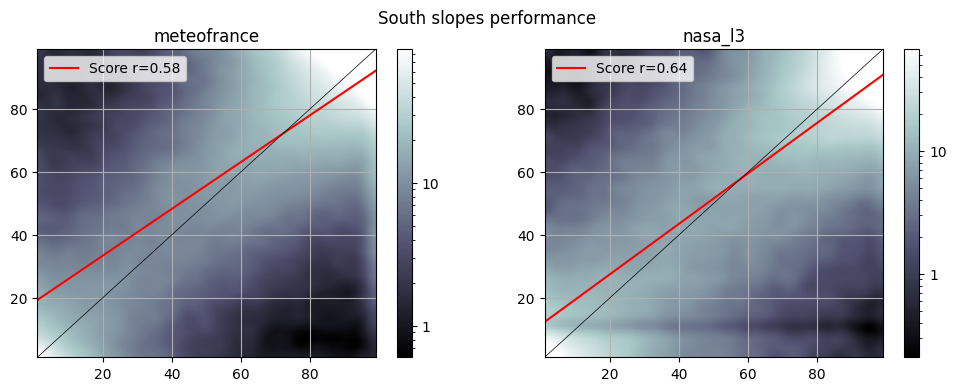

In [ ]:
fig, ax = plt.subplots(1,len(analyses_dict_v3), figsize=(12,4))
fig.suptitle('South slopes performance')
for i, (k,v) in enumerate(analyses_dict_v3.items()):
    reduced_v = v.sel(ref_bins=slice(1,99),forest_mask=[0],aspect_bins=['SE','S','SW'],test_bins=slice(1,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i], figure=fig)
    ax[i].set_title(k)

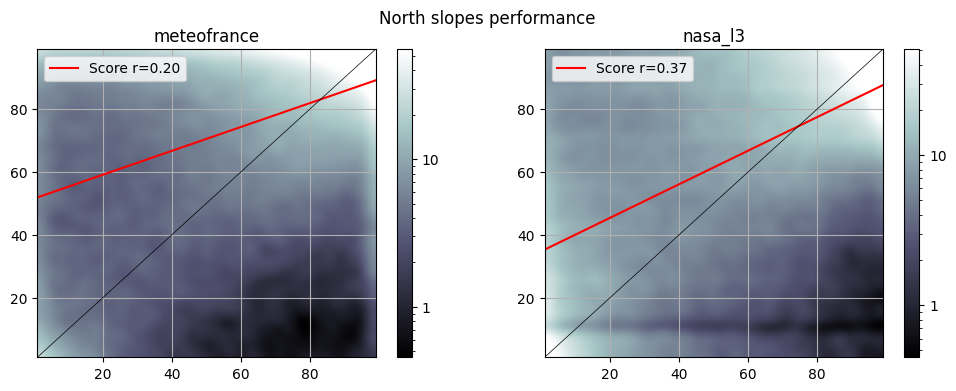

In [ ]:
fig, ax = plt.subplots(1,len(analyses_dict_v3), figsize=(12,4))
fig.suptitle('North slopes performance')
for i, (k,v) in enumerate(analyses_dict_v3.items()):
    reduced_v = v.sel(ref_bins=slice(1,99),forest_mask=[0],aspect_bins=['NE','N','NW'],test_bins=slice(1,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i], figure=fig)
    ax[i].set_title(k)

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME, PRODUCT_PLOT_NAMES
from matplotlib import  colors
from evaluations.scatter import fancy_scatter_plot

analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/{analysis_type}'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
mf_metrics_ds = mf_metrics_ds.assign_coords({'forest_mask': ['no_forest', 'forest']})
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.where(nasa_l3_metrics_ds>0, drop=True)
nasa_l3_metrics_ds = nasa_l3_metrics_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']}).rename({'forest_mask_bins': 'forest_mask'})
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_pseudo_l3_FSC_vs_s2_theia_FSC_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.where(nasa_pseudo_l3_metrics_ds>0, drop=True)
nasa_pseudo_l3_metrics_ds = nasa_pseudo_l3_metrics_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']}).rename({'forest_mask_bins': 'forest_mask'})
analyses_dict_v4 = {METEOFRANCE_VAR_NAME: mf_metrics_ds,  NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds,NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

[[0.6016271]]
[[0.55089732]]
[[0.65361966]]


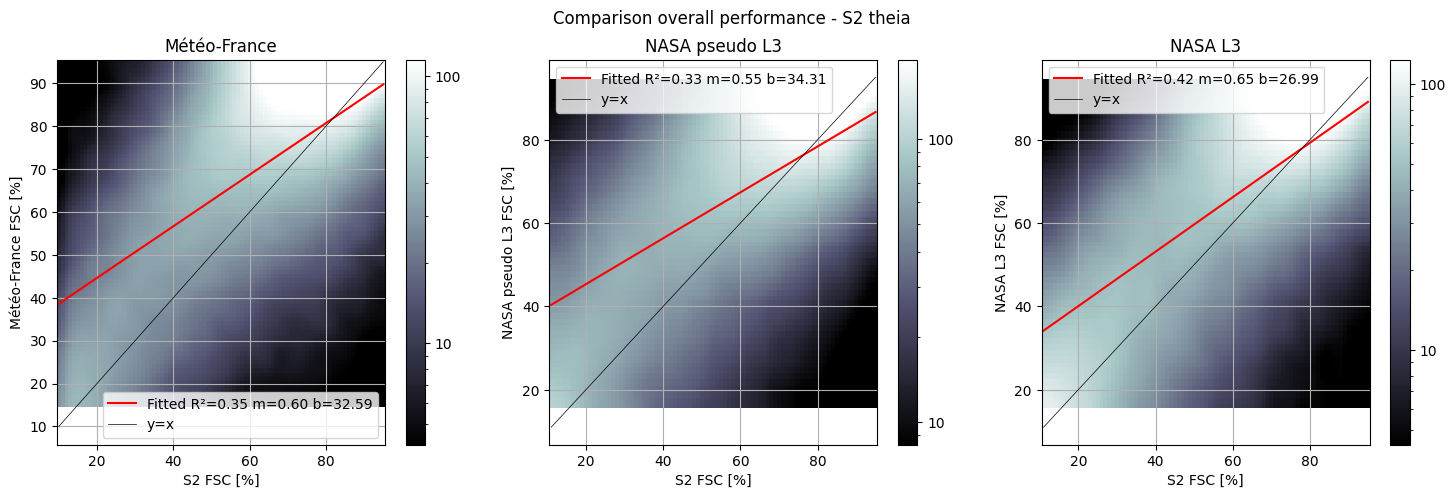

In [27]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Comparison overall performance - S2 theia')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = analyses_dict_v4
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,95),forest_mask=['no_forest'],test_bins=slice(15,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=2)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

[[0.7807336]]
[[0.7102934]]
[[0.85041889]]


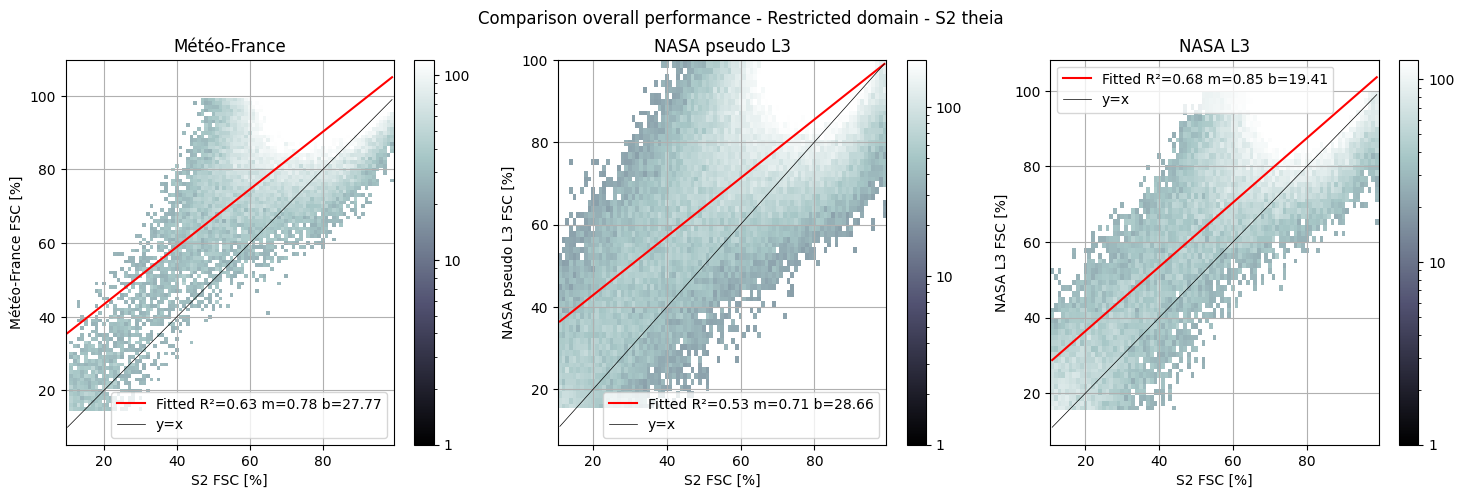

In [57]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Comparison overall performance - Restricted domain - S2 theia')

selection_dict = {k: v.sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06')) for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,99),forest_mask=['no_forest'],test_bins=slice(15,99)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>25,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

[[0.97329455]]
[[0.87039854]]
[[0.98945743]]


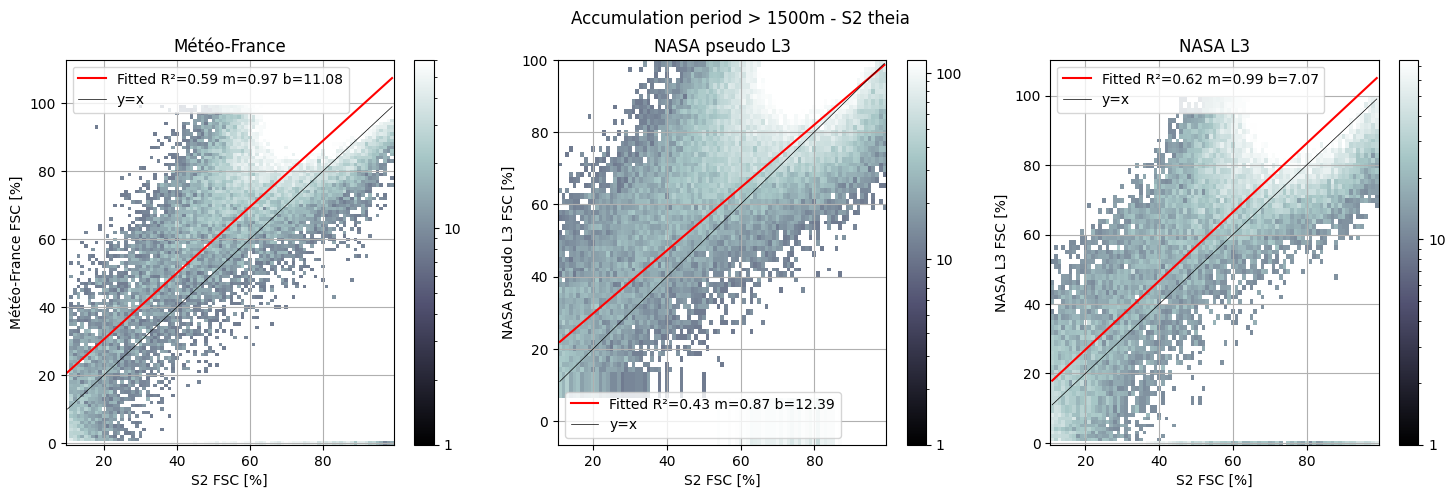

In [60]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Accumulation period > 1500m - S2 theia')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = {k: v.sel(time=slice('2023-12','2024-02')).sel(altitude_bins=slice(1500,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    if k=='meteofrance_l3':
        min_test=0
        fl = 7
    else:
        min_ref=15
        fl=10
    reduced_v = v.sel(ref_bins=slice(10,99),forest_mask=['no_forest'],test_bins=slice(min_test,99)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>fl,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")
    

[[0.79571227]]
[[0.74590594]]
[[0.90075541]]


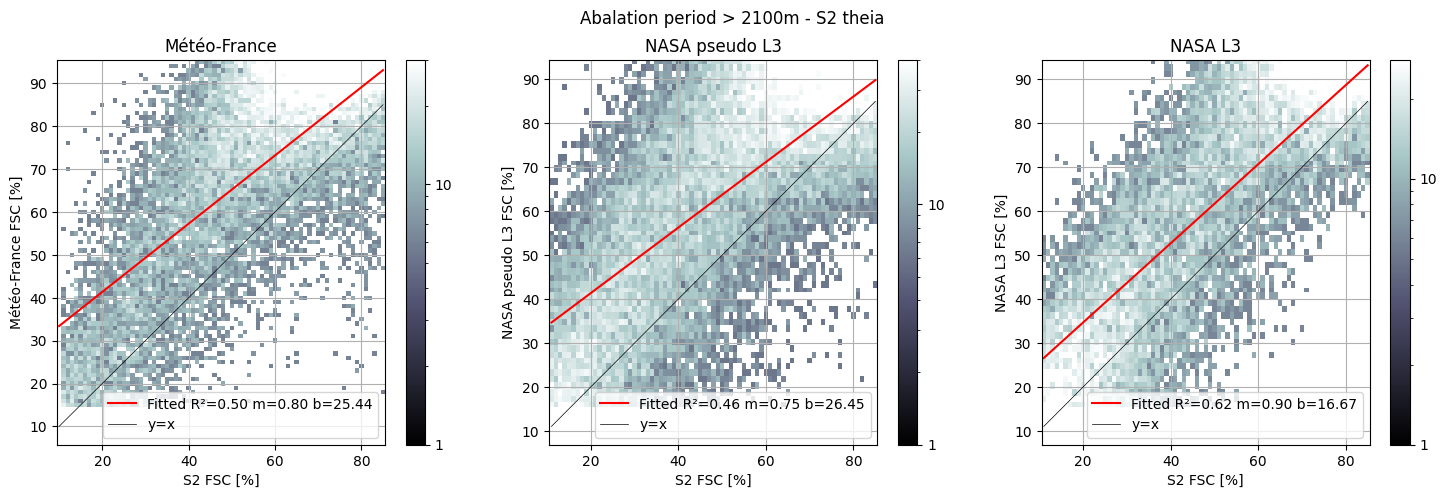

In [41]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Abalation period > 2100m - S2 theia')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = {k: v.sel(time=slice('2024-03','2024-07')).sel(altitude_bins=slice(2100,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    reduced_v = v.sel(ref_bins=slice(10,85),forest_mask=['no_forest'],test_bins=slice(15,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>5,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

[[0.89512509]]
[[0.77385869]]
[[0.88850614]]


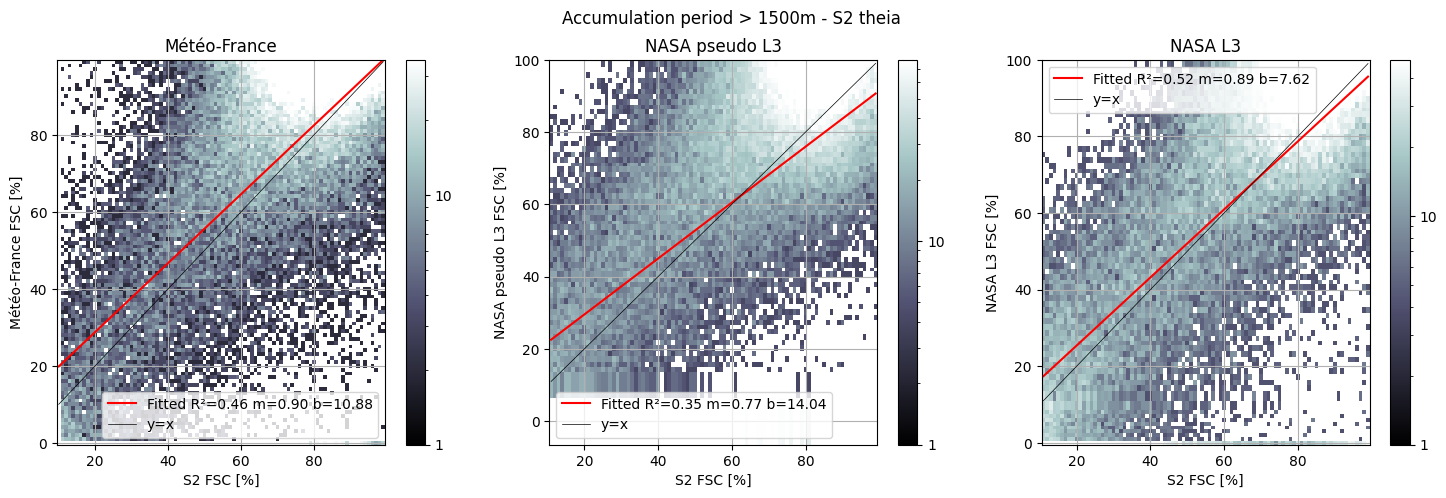

In [66]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Accumulation period > 1500m - S2 theia')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = {k: v.sel(time=slice('2023-12','2024-04')).sel(altitude_bins=slice(1500,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    if k=='meteofrance_l3':
        min_test=0
        fl = 1
    else:
        min_ref=15
        fl=3
    reduced_v = v.sel(ref_bins=slice(10,99),forest_mask=['no_forest'],test_bins=slice(min_test,99), aspect_bins=['N', 'NE', 'NW']).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>fl,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")
    

[[0.90334235]]
[[0.97010212]]
[[1.07970834]]


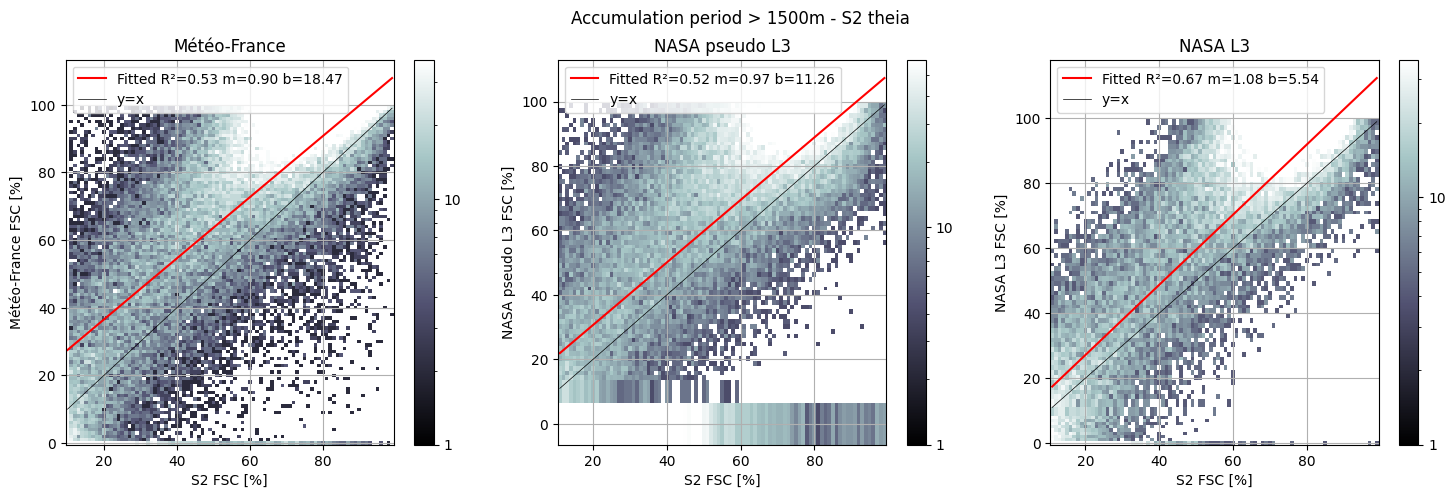

In [69]:
fig, ax = plt.subplots(1,len(analyses_dict_v4), figsize=(6*len(analyses_dict_v4), 5))
fig.suptitle('Accumulation period > 1500m - S2 theia')

# selection_dict = {k: v.sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict_v3.items()}
selection_dict = {k: v.sel(time=slice('2023-12','2024-04')).sel(altitude_bins=slice(1500,None))  for k,v in analyses_dict_v4.items()}
for i, (k,v) in enumerate(selection_dict.items()):
    if k=='meteofrance_l3':
        min_test=0
        fl = 1
    else:
        min_ref=15
        fl=3
    reduced_v = v.sel(ref_bins=slice(10,99),forest_mask=['no_forest'],test_bins=slice(min_test,99), aspect_bins=['S', 'SE', 'SW']).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
    reduced_v = reduced_v.where(reduced_v>fl,0)
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=0)
    ax[i].set_title(PRODUCT_PLOT_NAMES[k])
    ax[i].set_xlabel("S2 FSC [%]")
    ax[i].set_ylabel(f"{PRODUCT_PLOT_NAMES[k]} FSC [%]")

In [90]:
import numpy as np
from sklearn.linear_model import LinearRegression




scatter_nasa_l3_ndsi_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_nasa_vs_meteofrance_l3_375m.nc", decode_cf=True).sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06'))
scatter_nasa_l3_ndsi_ds = scatter_nasa_l3_ndsi_ds.where(scatter_nasa_l3_ndsi_ds>0, drop=True)
scatter_nasa_l3_ndsi_ds = scatter_nasa_l3_ndsi_ds.assign_coords({'forest_mask_bins': ['no_forest', 'forest']})

[[0.95456103]]


Text(0, 0.5, 'MF FSC [%]')

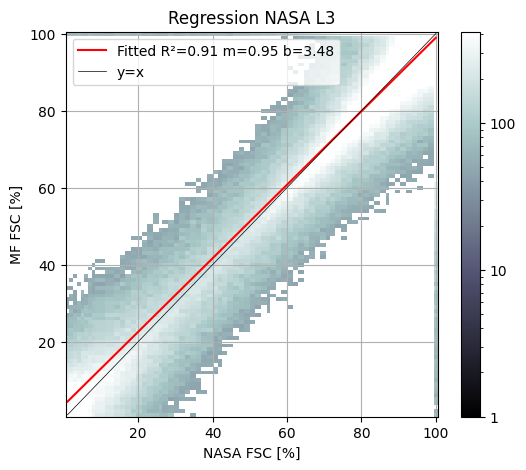

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
reduced_v = scatter_nasa_l3_ndsi_ds.sel(ref_bins=slice(1,100),forest_mask_bins=['no_forest'],test_bins=slice(1,100), time=slice('2023-12','2024-06'), altitude_bins=slice(900, None)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
reduced_v = reduced_v.where(reduced_v>45,0)
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
ax.set_title('Météo-France vs NASA')
ax.set_xlabel("NASA FSC [%]")
ax.set_ylabel("MF FSC [%]")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
reduced_v = scatter_nasa_l3_ndsi_ds.sel(ref_bins=slice(15,99),forest_mask_bins=['no_forest'],test_bins=slice(15,99)).sum(dim=('forest_mask_bins','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
reduced_v = reduced_v.where(reduced_v>2,0)
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
ax.set_title('Regression NASA L3')
ax.set_xlabel("NASA FSC [%]")
ax.set_ylabel("MF FSC [%]")

Text(0, 0.5, 'NASA NDSI [%]')

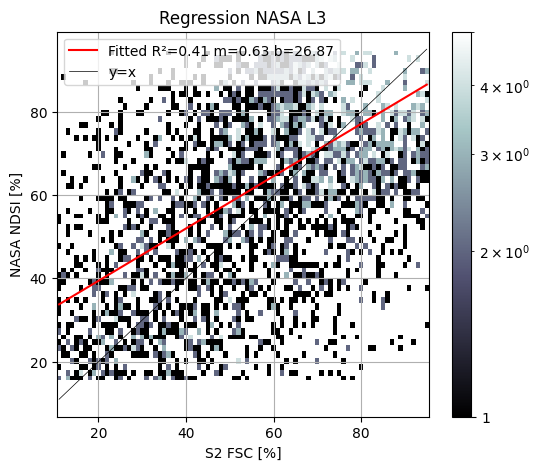

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression


fig, ax = plt.subplots(figsize=(6, 5))


nasa_l3_ndsi_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_nasa_NDSI_vs_s2_theia_FSC_375m.nc", decode_cf=True).sel(altitude_bins=slice(900,None)).sel(time=slice('2023-12', '2024-06'))
reduced_v = nasa_l3_ndsi_ds.sel(ref_bins=slice(10,95),forest_mask=['forest'],test_bins=slice(15,95)).sum(dim=('forest_mask','time','aspect_bins', 'altitude_bins')).data_vars['n_occurrences']
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=0)
ax.set_title('Regression NASA L3')
ax.set_xlabel("S2 FSC [%]")
ax.set_ylabel(f"NASA NDSI [%]")

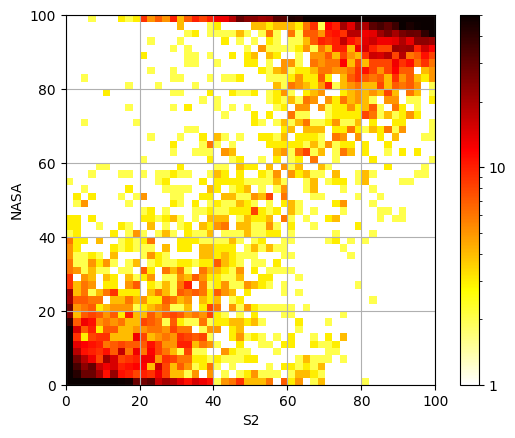

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm


nasa = nasa_time_series.data_vars['snow_cover'].sel(time=common_days)
s2 = s2_time_series.data_vars['snow_cover'].sel(time=common_days)
nasa = nasa.where(mf_forest_with_snow_mask)
nasa_mask = nasa<=100
s2_mask = s2<=100
union_mask = nasa_mask & s2_mask
nasa = nasa.where(union_mask)
s2 = s2.where(union_mask)

nasa = nasa.astype(np.float32).coarsen(y=4,x=4, boundary='trim').mean(skipna=False)
s2 = s2.astype(np.float32).coarsen(y=4,x=4, boundary='trim').mean(skipna=False)

fig, ax = plt.subplots()



img, extent = myplot(s2, nasa, 0, bins=50)
pos = ax.imshow(img, extent=list(extent), origin='lower',cmap=colorsmap,norm=colors.LogNorm(vmin=1, vmax=50))
fig.colorbar(pos, ax=ax, format=formatter)
ax.set_xlabel('S2')
ax.set_ylabel('NASA')
ax.grid(True)

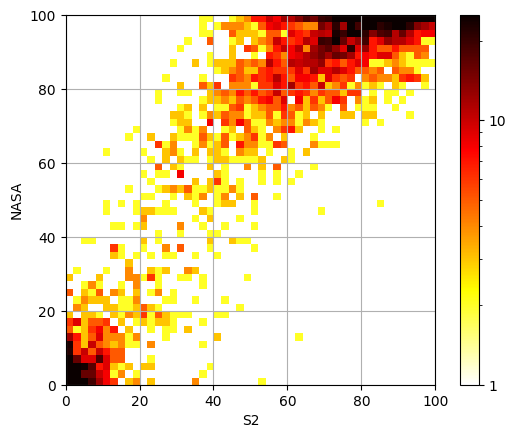

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm


nasa = nasa_time_series.data_vars['snow_cover'].sel(time=common_days)
s2 = s2_time_series.data_vars['snow_cover'].sel(time=common_days)
nasa_mask = nasa<=100
s2_mask = s2<=100
union_mask = nasa_mask & s2_mask
nasa = nasa.where(union_mask)
s2 = s2.where(union_mask)

nasa = nasa.astype(np.float32).coarsen(y=8,x=8, boundary='trim').mean(skipna=False)
s2 = s2.astype(np.float32).coarsen(y=8,x=8, boundary='trim').mean(skipna=False)

fig, ax = plt.subplots()



img, extent = myplot(s2, nasa, 0, bins=50)
pos = ax.imshow(img, extent=list(extent), origin='lower',cmap=colorsmap,norm=colors.LogNorm(vmin=1, vmax=25))
fig.colorbar(pos, ax=ax, format=formatter)
ax.set_xlabel('S2')
ax.set_ylabel('NASA')
ax.grid(True)

In [84]:
s2f = glob.glob('/home/imperatoren/work/VIIRS_S2_comparison/poc_resampling/FSC_20240130T105908_S2A_T31TCH_V102_1_FSCOG/*tif')[0]
s2_data = rio.open(s2f).read(1, masked=True)
#day = np.datetime64(datetime.datetime(year=2017, month=1, day=3))

vf = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/snow_cover_extent_analysis/WY_2023_2024_SuomiNPP_nasa_time_series.nc'
viirs = xr.open_dataset(vf).sel(time='2024-01-03')

In [85]:
A = viirs.data_vars['snow_cover']
viirs_masked = np.ma.masked_array(A, mask=A>=250)

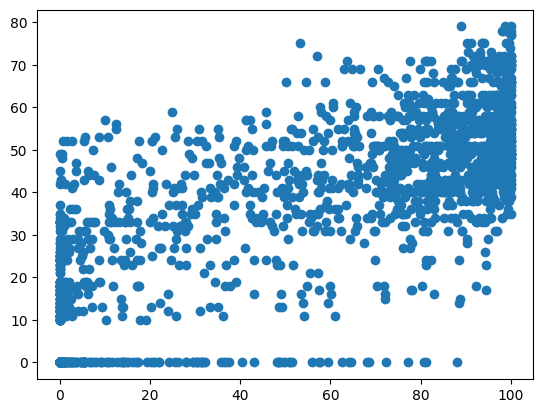

In [86]:
import matplotlib.pyplot as plt

plt.scatter(s2_data, viirs_masked)

In [3]:
from typing import List
import rasterio as rio
import glob as glob
import xarray as xr
import datetime as datetime
import numpy as np
import xarray as xr
from pathlib import Path
from winter_year import WinterYear
import pandas as pd
import matplotlib.pyplot as plt
winter_year = WinterYear(2023, 2024)
resolution=1000
time_series_folder = '../output_folder/version_3'
s2_filename = f'WY_2023_2024_S2_res_{resolution}m.nc'
mf_filename = f'WY_2023_2024_SNPP_meteofrance_res_{resolution}m.nc'
nasa_filename = f'WY_2023_2024_SNPP_nasa_l3_res_{resolution}m.nc'
nasa_pseudo_l3_filename = f'WY_2023_2024_SNPP_nasa_pseudo_l3_res_{resolution}m.nc'
s2_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(s2_filename))
meteofrance_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(mf_filename))
nasa_l3_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(nasa_filename))
nasa_pseudo_l3_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(nasa_pseudo_l3_filename))

def find_common_days(time_series_list: List[xr.Dataset]):
    common_days_old = time_series_list[0]["time"]
    for i in range(1,len(time_series_list)):
        common_days_new= np.intersect1d(common_days_old, time_series_list[i]["time"])
        common_days_old = common_days_new
    return common_days_new

common_days = find_common_days(time_series_list=[s2_time_series, meteofrance_time_series, nasa_pseudo_l3_time_series])
s2_time_series = s2_time_series.sel(time=common_days)
meteofrance_time_series = meteofrance_time_series.sel(time=common_days)
nasa_pseudo_l3_time_series = nasa_pseudo_l3_time_series.sel(time=common_days)
